<h1>Feather Tutorial</h1>

In [1]:
from graphviper.dask.client import local_client
log_params = {'log_level':'DEBUG'}
worker_log_params = {'log_level':'DEBUG'}
viper_client = local_client(cores=16, memory_limit="6GiB",log_params=log_params,worker_log_params=worker_log_params)
#viper_client = local_client(serial_execution=True)
viper_client

[2024-03-27 15:10:10,269]     INFO  graphviper:  Checking parameter values for client.local_client 
[2024-03-27 15:10:10,270]     INFO  graphviper:  Module path: /home/dmehring/projects/astroviper/xenv/lib/python3.10//site-packages/ 
[2024-03-27 15:10:10,271]     INFO  graphviper:  Searching /home/dmehring/projects/astroviper/xenv/lib/python3.10/site-packages/graphviper/config/ for configuration file, please wait ... 
[2024-03-27 15:10:10,280]  WARNING      client:  It is recommended that the local cache directory be set using the dask_local_dir parameter. 
[2024-03-27 15:10:13,077]    DEBUG      client:  These are the worker log parameters:
 {'logger_name': 'worker', 'log_to_term': True, 'log_level': 'DEBUG', 'log_to_file': False, 'log_file': 'client_worker.log'}
[2024-03-27 15:10:13,081]    DEBUG      client:  Loading plugin module: <class 'worker.DaskWorker'>
[2024-03-27 15:10:13,082]    DEBUG      client:  worker
[2024-03-27 15:10:13,182]    DEBUG   worker_13:  Logger created on wo

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 16
Total threads: 16,Total memory: 96.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:46771,Workers: 16
Dashboard: http://127.0.0.1:8787/status,Total threads: 16
Started: Just now,Total memory: 96.00 GiB
Comm: tcp://127.0.0.1:41913,Total threads: 1
Dashboard: http://127.0.0.1:32945/status,Memory: 6.00 GiB
Nanny: tcp://127.0.0.1:44701,


In [2]:
from astroviper.imaging import feather_v2
feather_v2(outim={"name": "feathered_image.img.zarr", "format": "zarr", "overwrite": True}, highres= 'int.zarr', lowres= 'sd.zarr', sdfactor=1)

[2024-03-27 15:10:49,377]    DEBUG      client:  Thread info {'n_threads': 16, 'memory_per_thread': 6.0}
[2024-03-27 15:10:49,379]    DEBUG      client:  Suggest n_chunks: 64, n_mem_chunks: 5, n_graph_chunks: 64
[2024-03-27 15:10:49,385]    DEBUG      client:  chunk_index: 0, (0,)
[2024-03-27 15:10:49,387]    DEBUG      client:  chunk_index: 1, (1,)
[2024-03-27 15:10:49,388]    DEBUG      client:  chunk_index: 2, (2,)
[2024-03-27 15:10:49,390]    DEBUG      client:  chunk_index: 3, (3,)
[2024-03-27 15:10:49,391]    DEBUG      client:  chunk_index: 4, (4,)
[2024-03-27 15:10:49,393]    DEBUG      client:  chunk_index: 5, (5,)
[2024-03-27 15:10:49,394]    DEBUG      client:  chunk_index: 6, (6,)
[2024-03-27 15:10:49,396]    DEBUG      client:  chunk_index: 7, (7,)
[2024-03-27 15:10:49,398]    DEBUG      client:  chunk_index: 8, (8,)
[2024-03-27 15:10:49,399]    DEBUG      client:  chunk_index: 9, (9,)
[2024-03-27 15:10:49,401]    DEBUG      client:  chunk_index: 10, (10,)
[2024-03-27 15:1

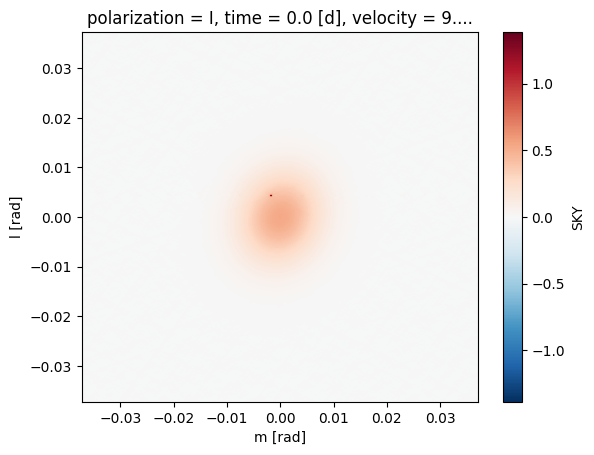

In [2]:
from xradio.image import load_image, read_image
feather_xds = load_image("feathered_image.img.zarr")


import numpy as np
np.nanmax(np.abs(feather_xds.SKY.values))
feather_xds.SKY.isel(polarization=0,frequency=1).plot()

In [3]:
feather_xds

<xarray.Dataset>
Dimensions:          (l: 1024, m: 1024, polarization: 1, time: 1, frequency: 16)
Coordinates:
    declination      (l, m) float64 -0.03724 -0.03717 -0.0371 ... 0.0371 0.03717
  * l                (l) float64 0.03723 0.03716 0.03709 ... -0.03709 -0.03716
  * m                (m) float64 -0.03723 -0.03716 -0.03709 ... 0.03709 0.03716
  * polarization     (polarization) <U1 'I'
    right_ascension  (l, m) float64 3.179 3.179 3.179 ... 3.104 3.104 3.104
  * time             (time) float64 0.0
    velocity         (frequency) float64 1.1e+07 9.626e+06 ... -9.626e+06
  * frequency        (frequency) float64 1.4e+09 1.407e+09 ... 1.493e+09 1.5e+09
Data variables:
    SKY              (time, polarization, frequency, l, m) float32 0.0008362 ...
Attributes:
    active_mask:      
    beam:             None
    description:      
    direction:        {'latpole': {'type': 'quantity', 'units': 'rad', 'value...
    history:          None
    object_name:      
    obsdate:          {'format': 'MJD', 'scale': 'UTC', 'type': 'time', 'unit...
    observer:         Karl Jansky
    pointing_center:  {'initial': True, 'value': [3.141592653589793, 0.0]}
    telescope:        {'name': 'ALMA', 'position': {'ellipsoid': 'GRS80', 'ty...